In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [5]:
df = pd.read_csv("HR_comma_sep.csv")

In [4]:
!unzip archive.zip

Archive:  archive.zip
replace HR_comma_sep.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [6]:
print("Dataset shape:", df.shape)
print("Columns:", df.columns)



Dataset shape: (14999, 10)
Columns: Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')


In [7]:
print("\nTarget variable distribution (left):")
print(df['left'].value_counts())




Target variable distribution (left):
left
0    11428
1     3571
Name: count, dtype: int64


In [9]:
print("\nAverage values grouped by retention (0=stay,1=left):")
print(df.groupby('left').mean(numeric_only=True))


Average values grouped by retention (0=stay,1=left):
      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


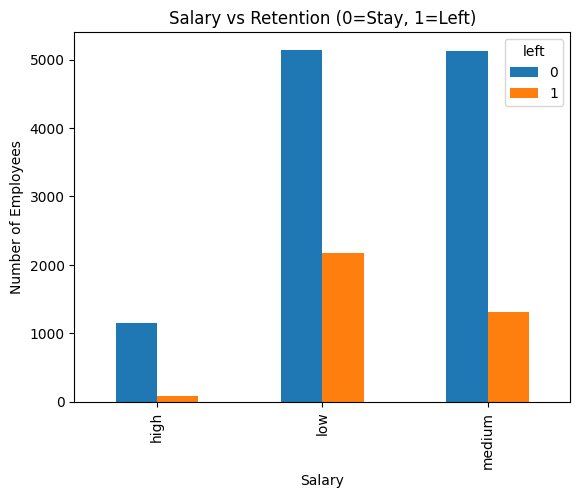

In [10]:
pd.crosstab(df['salary'], df['left']).plot(kind="bar")
plt.title("Salary vs Retention (0=Stay, 1=Left)")
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.show()



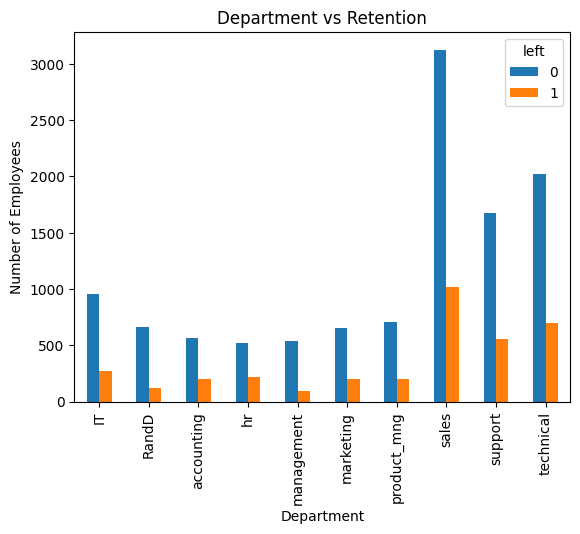

In [12]:
pd.crosstab(df['Department'], df['left']).plot(kind="bar")
plt.title("Department vs Retention")
plt.xlabel("Department")
plt.ylabel("Number of Employees")
plt.show()

In [15]:
features = ['satisfaction_level', 'average_montly_hours',
            'promotion_last_5years', 'salary', 'Department']

In [16]:
X = df[features]
X = pd.get_dummies(X, drop_first=True)  # Convert categorical vars (salary, sales)
y = df['left']


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)



In [18]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)



LogisticRegression(max_iter=1000)

In [19]:
_pred = model.predict(X_test)


In [21]:
print("\nModel Accuracy:", round(accuracy_score(y_test,_pred),4))


Model Accuracy: 0.765
